In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use("default")

### Redefining initial parameters

In [3]:
L = 10.0 # size of box
rho = 1.0 # density
N = int(rho * L**2) # number of particles
r0 = 1.0 # interaction radius
deltat = 1.0 # time step
factor = 0.2
v0 = r0 / deltat * factor # velocity
iterations = 100 # animation frames
eta = 0.15 # noise/randomness

#Defining parameters for a wall only in the x direction.
wall_x = 5.
wall_yMin = 0.
wall_yMax = 10.
wall_distance = 0.5
wall_turn = np.deg2rad(30)


# initialise positions and angles
positions = np.random.uniform(0, L, size = (N, 2))
angles = np.random.uniform(-np.pi, np.pi, size = N) 

new_positions = np.empty_like(positions)
new_angles = np.empty_like(angles)


### Creating a filter for the wall
checks how close the particle is to the wall

In [4]:
def x_wall_filter(x_pos,y_pos):
    if y_pos > wall_yMax:
        #particle above the wall
        distance_to_wall = np.sqrt((x_pos-wall_x)**2 + (y_pos-wall_yMax)**2)
    elif y_pos < wall_yMin:
        #particle below the wall
        distance_to_wall = np.sqrt((x_pos-wall_x)**2 + (y_pos-wall_yMin)**2)
    else:
        #particle level with the wall
        distance_to_wall = np.abs(x_pos-wall_x)
    return distance_to_wall

In [5]:
i = 1
# list of angles of neighbouring particles
neighbour_angles = []
# distance to other particles
for j in range(N):
    distance = np.linalg.norm(positions[i] - positions[j])
    # if within interaction radius add angle to list
    if distance < r0:
        neighbour_angles.append(angles[j])

#Checking if the particles are within distance_away from the wall
x_pos = positions[i,0]
y_pos = positions[i,1]
    
distance_to_wall = x_wall_filter(x_pos,y_pos)
# if there are neighbours, calculate average angle and noise/randomness      
print(distance <wall_distance)

if neighbour_angles:
    average_angle = np.mean(neighbour_angles)
    noise = eta * np.random.uniform(-np.pi, np.pi)
    if distance_to_wall < wall_distance:
        
    # Make the particle turn around based on the wall_turn parameter
        new_angles[i] = average_angle + wall_turn + noise # updated angle with noise
    else:
        new_angles[i] = average_angle + noise
else:
    # if no neighbours, keep current angle

    if distance_to_wall <wall_distance:
        new_angles[i] = angles[i] + wall_turn
        # Make the particle turn around based on the wall_turn parameter
    else:
        new_angles[i] = angles[i]
# update position based on new angle
# new position from speed and direction   
new_positions[i] = positions[i] + v0 * np.array([np.cos(new_angles[i]), np.sin(new_angles[i])]) * deltat
# boundary conditions of bo
new_positions[i] %= L

False


<Axes: >

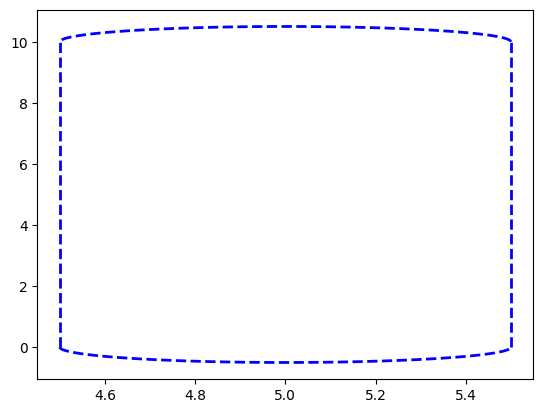

In [6]:
def plot_x_wall_boundary(ax):
    # Boundary left and right of the wall within vertical bounds
    ax.plot([wall_x - wall_distance, wall_x - wall_distance], [wall_yMin, wall_yMax], 'b--', lw=2, label=f'Boundary at {wall_distance} units')
    ax.plot([wall_x + wall_distance, wall_x + wall_distance], [wall_yMin, wall_yMax], 'b--', lw=2)
    
    # Boundary above the wall (top circle segment)
    theta = np.linspace(0, np.pi, 100)  # For the top part of the wall
    top_circle_x = wall_x + wall_distance * np.cos(theta)
    top_circle_y = wall_yMax + wall_distance * np.sin(theta)
    ax.plot(top_circle_x, top_circle_y, 'b--', lw=2)
    
    # Boundary below the wall (bottom circle segment)
    theta = np.linspace(np.pi, 2 * np.pi, 100)  # For the bottom part of the wall
    bottom_circle_x = wall_x + wall_distance * np.cos(theta)
    bottom_circle_y = wall_yMin + wall_distance * np.sin(theta)
    ax.plot(bottom_circle_x, bottom_circle_y, 'b--', lw=2)
    return ax
fig,ax = plt.subplots()
plot_x_wall_boundary(ax)

In [7]:
def position_filter(positions,filter_func):
    for i in range(len(positions)):
        # Check if the particle is too close to the wall
        while filter_func(positions[i][0], positions[i][1]) <= wall_distance:
            # Regenerate position until it is far enough from the wall
            positions[i] = np.random.uniform(0, L, size=(1, 2))
    return positions
new_positions = position_filter(positions,x_wall_filter)

<Axes: >

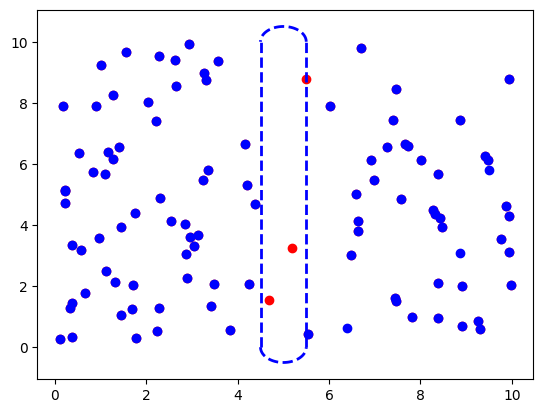

In [8]:
fig,ax = plt.subplots()
positions = np.random.uniform(0, L, size = (N, 2))
ax.scatter(positions[:,0], positions[:,1], color = 'red', label = "old positions")
new_positions = position_filter(positions, x_wall_filter)
ax.scatter(new_positions[:,0], new_positions[:,1], color = 'blue', label = "adjusted positions")

plot_x_wall_boundary(ax)

## Adjusting the wall to change the direction as a function of distance from the wall

In [9]:
wall_x = 5.
wall_yMin = 0.
wall_yMax = 10.
wall_distance = 0.5
wall_turn = np.deg2rad(30)
turn_factor = 1

N = 5
max_num_neighbours = N
# # initialise positions and angles
# positions = np.random.uniform(0, L, size = (N, 2))
# angles = np.random.uniform(-np.pi, np.pi, size = N)
x_values = np.linspace(4.4, 4.9, N)
y_values = np.full(N, 5.)
pos = np.column_stack((x_values, y_values))
angles = np.random.uniform(-np.pi, np.pi, size =N)

new_positions = np.empty_like(positions)
new_angles = np.empty_like(angles)
neigh_angles = np.empty(max_num_neighbours)



$$
\begin{equation}
  \theta_{turn} = \frac{k}{r_{w,a}} \theta_{def} \quad r_{w,a}< r_{mw}.
\end{equation}
$$

In [10]:
def varying_angle_turn(dist, turn_factor):
    global wall_distance, wall_turn
    turn_angle = np.where(dist < wall_distance, wall_turn * np.exp(-turn_factor * dist), 0)
    return turn_angle
for i in range(len(pos)):
    x_pos, y_pos = pos[i,0],pos[i,1]
    dist = x_wall_filter(x_pos, y_pos)
    print(f" dist {dist:.2f}, wall turn {np.rad2deg(varying_angle_turn(dist=dist, turn_factor =0.3)):.2f} degrees")

 dist 0.60, wall turn 0.00 degrees
 dist 0.47, wall turn 26.02 degrees
 dist 0.35, wall turn 27.01 degrees
 dist 0.22, wall turn 28.04 degrees
 dist 0.10, wall turn 29.11 degrees


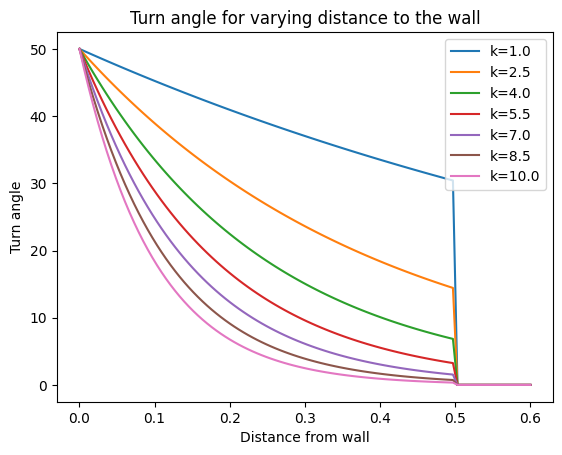

In [11]:
dist = np.linspace(0,0.6,100)
ks = np.linspace(1,10, 7)

wall_turn = np.deg2rad(50)
fig,ax = plt.subplots()
for k in ks:
    thetas = varying_angle_turn(dist, k)
    ax.plot(dist, np.rad2deg(thetas), label=f'k={k}')
ax.legend()
ax.set_xlabel("Distance from wall")
ax.set_ylabel("Turn angle")
ax.set_title("Turn angle for varying distance to the wall")
plt.show()

## Creating a rectangle for the particles

- use matplotlib rectangle creator to plot, 
- then create a filter function for the distance away.

In [12]:
x_min, x_max, y_min, y_max = 4.,6.,4.,6.
def rectangle_wall_filter(x_pos, y_pos, x_min = x_min, x_max = x_max, y_min = y_min, y_max = y_max):
    """
    Finds the distance of the particle to the nearest wall of a rectangle.

    Args:
        x_pos (float): x position of the particle
        y_pos (float): y position of the particle
    x_min, x_max, y_min, y_max
    Returns:
        float: distance of the particle to the nearest wall
    """
    # global x_min, x_max, y_min, y_max
    # If the particle is outside the rectangle, calculate the Euclidean distance to the nearest corner
    if x_pos < x_min & y_pos > y_max:  # Top-left corner
        distance_to_wall = np.sqrt((x_pos - x_min)**2 + (y_pos - y_max)**2)
    elif x_pos > x_max & y_pos > y_max:  # Top-right corner
        distance_to_wall = np.sqrt((x_pos - x_max)**2 + (y_pos - y_max)**2)
    elif x_pos < x_min & y_pos < y_min:  # Bottom-left corner
        distance_to_wall = np.sqrt((x_pos - x_min)**2 + (y_pos - y_min)**2)
    elif x_pos > x_max & y_pos < y_min:  # Bottom-right corner
        distance_to_wall = np.sqrt((x_pos - x_max)**2 + (y_pos - y_min)**2)
    
    # If the particle is horizontally aligned with the rectangle, calculate vertical distance
    elif x_min <= x_pos <= x_max and y_pos > y_max:  # Above the rectangle
        distance_to_wall = y_pos - y_max
    elif x_min <= x_pos <= x_max and y_pos < y_min:  # Below the rectangle
        distance_to_wall = y_min - y_pos
    
    # If the particle is vertically aligned with the rectangle, calculate horizontal distance
    elif y_min <= y_pos <= y_max and x_pos < x_min:  # Left of the rectangle
        distance_to_wall = x_min - x_pos
    elif y_min <= y_pos <= y_max and x_pos > x_max:  # Right of the rectangle
        distance_to_wall = x_pos - x_max
    
    # If the particle is inside the rectangle, distance is zero
    else:
        distance_to_wall = -1
    
    return distance_to_wall

0.5


<Axes: >

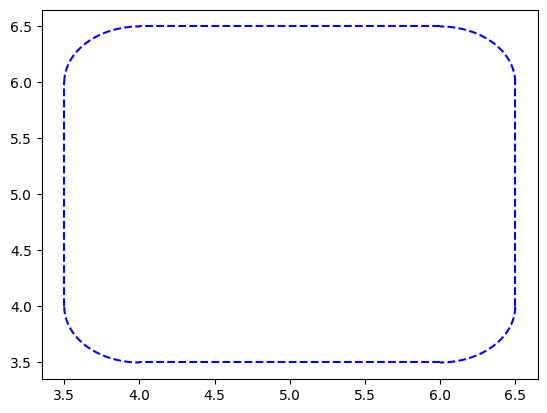

In [13]:
def plot_rectangle_boundary(ax):
    print(wall_distance)
    width = x_max- x_min
    height = y_max - y_min
    color = "blue"
    linestyle = "dotted"
    ax.plot([x_max, x_min], np.array([y_min, y_min]) - wall_distance, 'b--')
    ax.plot([x_max, x_min], np.array([y_max, y_max]) + wall_distance, 'b--')
    ax.plot(np.array([x_min, x_min]) - wall_distance, [y_min, y_max], 'b--')
    ax.plot(np.array([x_max, x_max]) + wall_distance, [y_min, y_max], 'b--')

     # Define the corner angles
    theta = np.linspace(0, np.pi/2, 100)  # For a quarter circle

    # Top-left corner
    top_left_x = x_min - wall_distance * np.cos(theta)
    top_left_y = y_max + wall_distance * np.sin(theta)
    ax.plot(top_left_x, top_left_y, 'b--')

    # Top-right corner
    top_right_x = x_max + wall_distance * np.cos(theta)
    top_right_y = y_max + wall_distance * np.sin(theta)
    ax.plot(top_right_x, top_right_y, 'b--')

    # Bottom-right corner
    bottom_right_x = x_max + wall_distance * np.cos(theta)
    bottom_right_y = y_min - wall_distance * np.sin(theta)
    ax.plot(bottom_right_x, bottom_right_y, 'b--')

    # Bottom-left corner
    bottom_left_x = x_min - wall_distance * np.cos(theta)
    bottom_left_y = y_min - wall_distance * np.sin(theta)
    ax.plot(bottom_left_x, bottom_left_y, 'b--')

    return ax

fig,ax = plt.subplots()
plot_rectangle_boundary(ax)

0.5


(0.0, 10.0)

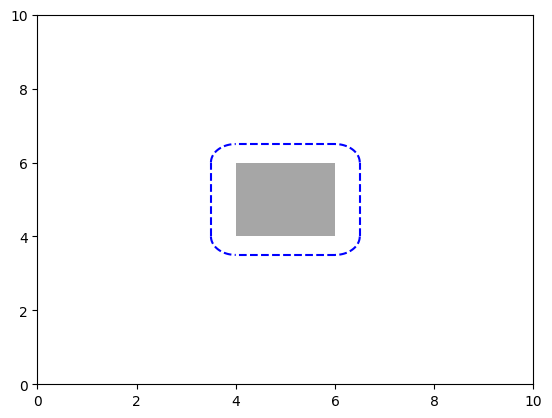

In [14]:
# import matplotlib.patches as patches
def plot_rectangle(ax, color = 'grey'):
    #  x_min = x_min, x_max = x_max, y_min = y_min, y_max=y_min
    global x_min, x_max, y_min, y_max
    # Calculate the width and height of the rectangle
    width = x_max - x_min
    height = y_max - y_min

    rect = plt.Rectangle((x_min, y_min), height, width, facecolor = color, alpha = 0.7)
    ax.add_artist(rect)
    return ax
fig,ax = plt.subplots()
ax = plot_rectangle(ax)
ax = plot_rectangle_boundary(ax)
ax.set_xlim(0,10)
ax.set_ylim(0,10)

## Edit Turn funciton
$$
z_{i} = z_{\text{neighbours}} + (\frac{1}{\alpha r} + 0 j) \quad |r|< r_{mw}.
$${#eq-anglefix1}
$$
z_{i} = z_{\text{neighbours}} + (\frac{\alpha}{\gamma r_x}+\frac{\beta}{\gamma r_y}j) \quad |r|<r_{mw}.
$$

Writing a function that does the wall part of the turn
Variables needed to turn:
 - `x_pos`, `y_pos`
 - `turn_factor`
 - `wall_distance`


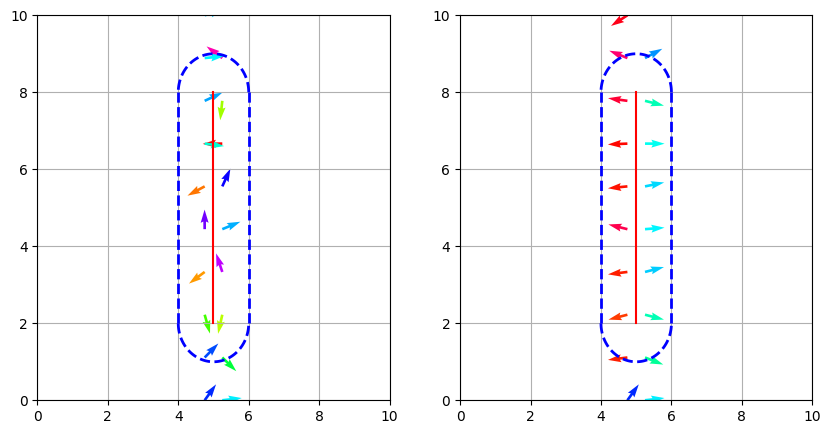

In [15]:
turn_factor = turn_factor
wall_distance = 1
wall_x = 5
wall_yMin = 2
wall_yMax = 10-wall_yMin

def varying_angle_turn(x_pos, y_pos, turn_factor):
    alpha = beta = 1
    x_dist = y_dist = 1

    x_dist = x_pos- wall_x
    # alpha *= np.sign(x_dist)
    # print(alpha)
    dist = x_wall_filter(x_pos, y_pos)
    if dist < wall_distance:
        if wall_yMin <= y_pos <= wall_yMax:
            beta = 0 # Turn off any interaction in y direction
            
        elif wall_yMin > y_pos:
            beta = 1
            y_dist =  y_pos - wall_yMin
        elif wall_yMax < y_pos:
            y_dist = y_pos - wall_yMax

        complex_turn = alpha/(turn_factor*(x_dist)) +beta/(turn_factor*y_dist)*1.0j
    else:
        complex_turn = 0
    return complex_turn

# def neighbour_turn()

N = 20
# positions = np.random.uniform(0, L, size = (N, 2))
dist_from_wall = 0.25

# Calculate half of N
half_N = N // 2

# First half: positions on one side of the wall
x_positions_1 = np.ones(half_N) * (wall_x + dist_from_wall)  # x-coordinates for the first half
y_positions_1 = np.linspace(0, L, half_N)  # y-coordinates for the first half

# Second half: positions on the other side of the wall
x_positions_2 = np.ones(half_N) * (wall_x - dist_from_wall)  # x-coordinates for the second half
y_positions_2 = np.linspace(0, L, half_N)  # y-coordinates for the second half

# Combine both halves into a single array
positions = np.vstack((np.column_stack((x_positions_1, y_positions_1)),
                       np.column_stack((x_positions_2, y_positions_2))))

# print(positions)

angles = np.random.uniform(-np.pi, np.pi, size = N) 
new_angles = np.empty(angles.size)
for i in range(N-1):
    x_pos, y_pos = positions[i]
    complex_angle = np.exp(angles[i]*1j)
    new_complex_angle = complex_angle + varying_angle_turn(x_pos, y_pos, turn_factor) #+ complex number of any neighbour values
    new_angles[i] = np.angle(new_complex_angle)

    # print(x_pos, angles[i], new_angles[i])


fig, ax = plt.subplots(figsize = (10,5), ncols = 2)

qv = ax[0].quiver(positions[:,0], positions[:,1], np.cos(angles), np.sin(angles), angles, clim = [-np.pi,np.pi], cmap = "hsv")
qv = ax[1].quiver(positions[:,0], positions[:,1], np.cos(new_angles), np.sin(new_angles), new_angles, clim = [-np.pi,np.pi], cmap = "hsv")
ax[0] = plot_x_wall_boundary(ax=ax[0])
ax[1] = plot_x_wall_boundary(ax=ax[1])

ax[0].grid()
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)
ax[0].axvline(5, ymin = wall_yMin/L, ymax = wall_yMax/L, color ="r")

ax[1].grid()
ax[1].set_ylim(0,10)
ax[1].set_xlim(0,10)
ax[1].axvline(5, ymin = wall_yMin/L, ymax = wall_yMax/L, color ="r")

This made the particles in the boundary always head right **Fixed** got rid of the divide by zero filter. This should still be inputted but change $\alpha, \beta$ to be zero or something

The particles at the bottom of the barrier are still being inversley turned away in the x direction even if they are close to the barrier. i.e if it is close to `wall_yMin - wall_distance` but at x=5 then it wall get a very large turn in the x_direciton. We don't want this, so it needs to use `dist_to_wall` as the inverse turn.

(0.11179477306786481-0.9937313161588017j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(0.11179477306786477+0.9937313161588018j)
(-0.11179477306786481-0.9937313161588017j)
(-1+0j)
(-1+0j)
(-1+0j)
(-1+0j)
(-1+0j)
(-1+0j)
(-0.11179477306786477+0.9937313161588018j)


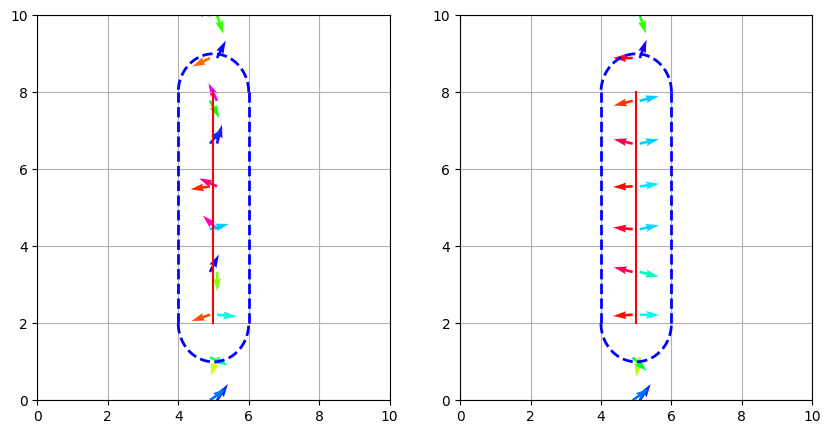

In [16]:
turn_factor = 0.4
wall_distance = 1
wall_x = 5
wall_yMin = 2
wall_yMax = 10-wall_yMin

def varying_angle_turn(x_pos, y_pos, turn_factor):
    x_dist = x_pos- wall_x

    
    dist = x_wall_filter(x_pos, y_pos)
    if dist < wall_distance:
        if wall_yMin <= y_pos <= wall_yMax:
            y_dist = 0 # Turn off any interaction in y direction
            
        elif wall_yMin > y_pos:
            beta = 1
            y_dist =  y_pos - wall_yMin
        elif wall_yMax < y_pos:
            y_dist = y_pos - wall_yMax

        r_hat = (x_dist +y_dist*1j)/np.linalg.norm(x_dist +y_dist*1j)
        print(r_hat)
        #complex_turn = alpha/(turn_factor*dist*r_hat.real) +beta/(turn_factor*r_hat.imag)*1.0j
        complex_turn = (turn_factor/dist)*r_hat
    else:
        complex_turn = 0
    return complex_turn

# def neighbour_turn()

N = 20
# positions = np.random.uniform(0, L, size = (N, 2))
dist_from_wall = 0.5/5
half_N = N // 2
x_positions_1 = np.ones(half_N) * (wall_x + dist_from_wall)  # x-coordinates for the first half
y_positions_1 = np.linspace(0, L, half_N)  # y-coordinates for the first half
x_positions_2 = np.ones(half_N) * (wall_x - dist_from_wall)  # 
y_positions_2 = np.linspace(0, L, half_N)  # y-coordinates for the second half
positions = np.vstack((np.column_stack((x_positions_1, y_positions_1)),
                       np.column_stack((x_positions_2, y_positions_2))))

# print(positions)

angles = np.random.uniform(-np.pi, np.pi, size = N) 
new_angles = np.empty(angles.size)
for i in range(N-1):
    x_pos, y_pos = positions[i]
    complex_angle = np.exp(angles[i]*1j)
    new_complex_angle = complex_angle + varying_angle_turn(x_pos, y_pos, turn_factor) #+ complex number of any neighbour values
    new_angles[i] = np.angle(new_complex_angle)

    # print(x_pos, angles[i], new_angles[i])


fig, ax = plt.subplots(figsize = (10,5), ncols = 2)

qv = ax[0].quiver(positions[:,0], positions[:,1], np.cos(angles), np.sin(angles), angles, clim = [-np.pi,np.pi], cmap = "hsv")
qv = ax[1].quiver(positions[:,0], positions[:,1], np.cos(new_angles), np.sin(new_angles), new_angles, clim = [-np.pi,np.pi], cmap = "hsv")
ax[0] = plot_x_wall_boundary(ax=ax[0])
ax[1] = plot_x_wall_boundary(ax=ax[1])

ax[0].grid()
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)
ax[0].axvline(5, ymin = wall_yMin/L, ymax = wall_yMax/L, color ="r")

ax[1].grid()
ax[1].set_ylim(0,10)
ax[1].set_xlim(0,10)
ax[1].axvline(5, ymin = wall_yMin/L, ymax = wall_yMax/L, color ="r")

**BOSH**

##### Sorting out boundrary conditions on the stream plot

In [110]:
N=5
old_pos = np.random.uniform(0, L, size = (N, 2))
pos = np.random.uniform(0, L, size = (N, 2))
angles = np.random.uniform(-np.pi, np.pi, size = N) 

dr = old_pos - pos
print(dr, "\n")
print(np.where(np.abs(dr) >5.0, 10, dr), "\n")
dr = np.where(dr >5.0, dr-10, dr)
dr = np.where(dr < -5.0, dr+10, dr)

print(dr, "\n")

[[-7.43288147 -7.4968622 ]
 [-0.81229501  2.52230222]
 [-2.46471023 -1.25987458]
 [ 4.90966885 -1.08750582]
 [ 0.27699862  7.3824515 ]] 

[[10.         10.        ]
 [-0.81229501  2.52230222]
 [-2.46471023 -1.25987458]
 [ 4.90966885 -1.08750582]
 [ 0.27699862 10.        ]] 

[[ 2.56711853  2.5031378 ]
 [-0.81229501  2.52230222]
 [-2.46471023 -1.25987458]
 [ 4.90966885 -1.08750582]
 [ 0.27699862 -2.6175485 ]] 

